<a href="https://colab.research.google.com/github/Dheandralf/MachineLearning/blob/main/7thWeeksTasks/Task7_XGBoost_Dheandra_1103213048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Dheandra Alfarrelwijaya
Nim : 1103213048    
Kelas : TK-45-04   
Lecture : 7    
Dataset : melb_data.csv    

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


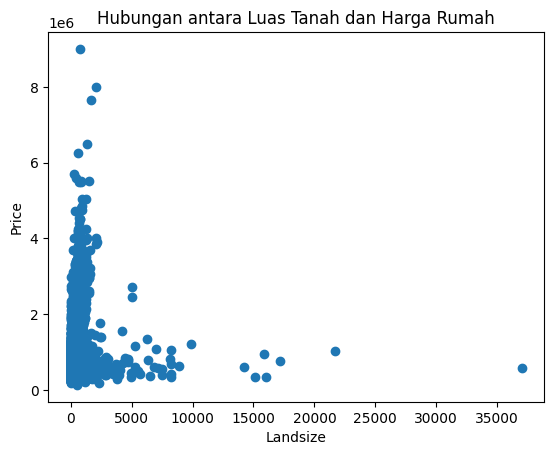

MAE XGBoost: 160100.03033384884
MAE Random Forest: 162017.47232383004
MAE Decision Tree: 228969.4174287251


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Path menuju dataset di Google Drive
df_path = '/content/drive/My Drive/dataset/melb_data.csv'

# Membaca dataset
df = pd.read_csv(df_path)

# Menghapus baris dengan nilai NaN
melb_data = df.dropna(axis=0)

# Melakukan one-hot encoding pada data kategorikal
melb_data_encoded = pd.get_dummies(melb_data)

# Memvisualisasikan data
plt.scatter(melb_data['Landsize'], melb_data['Price'])
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Hubungan antara Luas Tanah dan Harga Rumah')
plt.show()

# Membagi data menjadi data latih dan data uji (70% untuk pelatihan)
X = melb_data_encoded.drop('Price', axis=1)
y = melb_data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model menggunakan XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Melatih model menggunakan Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Melatih model menggunakan Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Mengevaluasi model menggunakan Mean Absolute Error (MAE)
xgb_predictions = xgb_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

print("MAE XGBoost:", xgb_mae)
print("MAE Random Forest:", rf_mae)
print("MAE Decision Tree:", dt_mae)
